In [1]:
# Source code adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, manifold, mixture
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

In [3]:
# Make toy 2D datasets
n_samples = 1000
random_state = 9

circles = sklearn.datasets.make_circles(
    n_samples=n_samples,
    factor=.5,
    noise=.05,
    random_state=random_state
)
moons = sklearn.datasets.make_moons(
    n_samples=n_samples,
    noise=.05,
    random_state=random_state
)
blobs = sklearn.datasets.make_blobs(
    n_samples=n_samples,
    random_state=random_state
)
mixed_blobs = sklearn.datasets.make_blobs(
    n_samples=n_samples,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=random_state
)
X, y = sklearn.datasets.make_blobs(
    n_samples=n_samples,
    random_state=random_state
)
transform = [[0.6, -0.6], [-0.4, 0.8]]
segments = (np.dot(X, transform), y)

scaler = StandardScaler()

datasets = {
    'Circles': (scaler.fit_transform(circles[0]), circles[1], 2),
    'Moons':   (scaler.fit_transform(moons[0]), moons[1], 2),
    'Blobs':   (scaler.fit_transform(blobs[0]), blobs[1],3),
    'Uneven Blobs':  (scaler.fit_transform(mixed_blobs[0]), mixed_blobs[1], 3),
    'Segments':   (scaler.fit_transform(segments[0]), segments[1], 3)
}

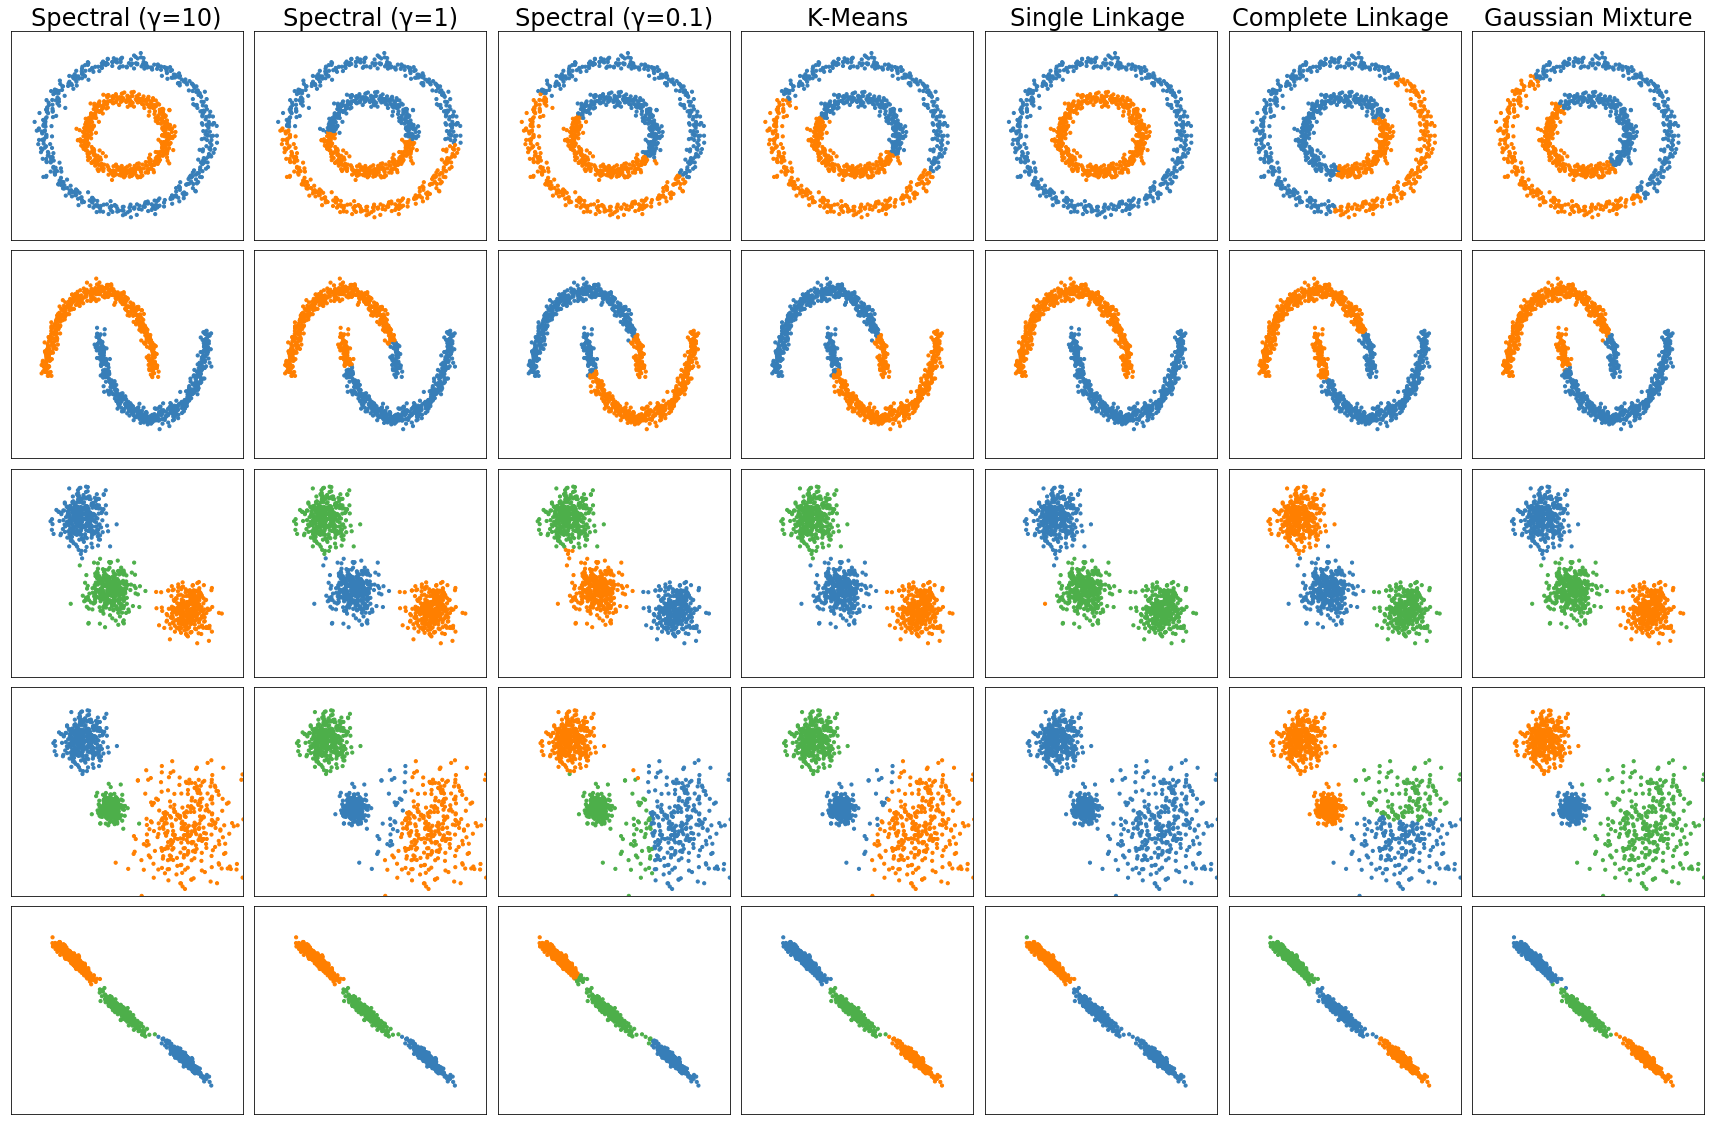

In [4]:
plot_num = 1
plt.figure(figsize=(24, 16))
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.95, wspace=.05, hspace=.05)

for i, (data_name, (X, y, k)) in enumerate(datasets.items()):
    # Clustering algorithms
    k_means = cluster.KMeans(n_clusters=k)
    single_linkage = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
    complete_linkage = cluster.AgglomerativeClustering(n_clusters=k, linkage='complete')
    gaussian_mixture = mixture.GaussianMixture(n_components=k)
    
    # Simple hyperparameter search
    # Note that scikit-learn implementation of spectral clustering is based on Shi and Malik (2000)
    gamma = [10, 1, 0.1]
    spectral = [cluster.SpectralClustering(n_clusters=k, affinity='rbf', gamma=x) for x in gamma]

    algorithms = [
        ('Spectral (γ={})'.format(gamma[0]), spectral[0]),
        ('Spectral (γ={})'.format(gamma[1]), spectral[1]),
        ('Spectral (γ={})'.format(gamma[2]), spectral[2]),
        ('K-Means', k_means),
        ('Single Linkage ', single_linkage),
        ('Complete Linkage ', complete_linkage),
        ('Gaussian Mixture', gaussian_mixture)
    ]

    for algo_name, algorithm in algorithms:
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(algorithms), plot_num)
        if i == 0:
            plt.title(algo_name, size=24)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

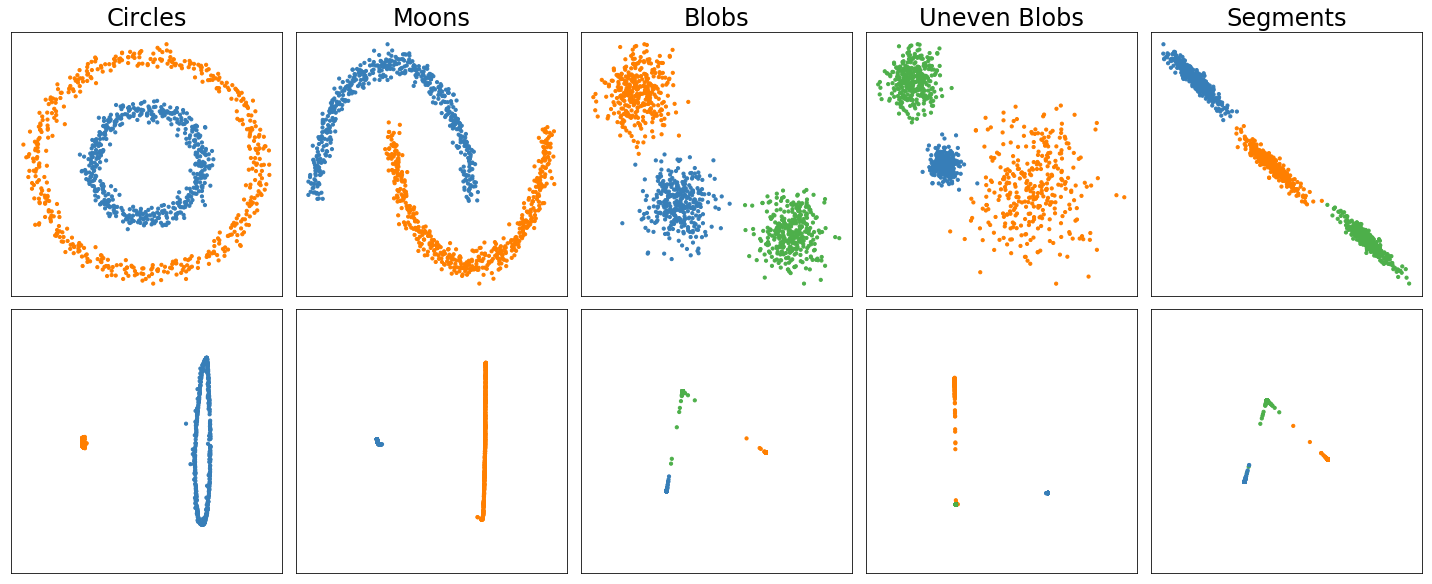

In [5]:
plot_num = 1
plt.figure(figsize=(20, 8))
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.95, wspace=.05, hspace=.05)

for i, (data_name, (X, y, k)) in enumerate(datasets.items()):
    spectral = cluster.SpectralClustering(n_clusters=k, affinity='rbf', gamma=10)
    spectral.fit(X)
    y_pred = spectral.labels_.astype(np.int)
    
    # Compute spectral embedding
    embedding = manifold.spectral_embedding(spectral.affinity_matrix_, n_components=k)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    plt.subplot(2, 5, plot_num)
    plt.title(data_name, size=24)
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(2, 5, plot_num + 5)
    plt.scatter(embedding[:, 0], embedding[:, 1], s=10, color=colors[y])
    plt.xticks(())
    plt.yticks(())
    plot_num += 1